<h2 style="display: flex; justify-content: space-between; align-items: center;">
    <span>Exercise 7a</span>
    <span>Date: 19/02/2025</span>
</h2>

<h2 style="text-align:center;">Support Vector Classification - Binary classification on Linearly Separable Dataset</h2>

### <ins>**Aim:**</ins> To build a Support Vector Machine (SVM) classifier to separate two linearly separable classes and visualize the decision boundary, margins and support vectors.

### <ins>**Algorithm:**</ins>

Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It finds an optimal hyperplane that maximizes the margin between different classes. The decision boundary is determined by support vectors, which are the data points closest to the margin.

The equation of the hyperplane is:
$$w^{T}x+b=0$$
Where:
- $w$ is the weight vector.
- $x$ is the input feature vector.
- $b$ is the bias term.

The decision function is given by:
$$f(x)=sign(w^{T}x+b)$$
where the class label is determined based on the sign of $f(x)$.

Step 1: Import Libraries

- Import necessary Python libraries such as NumPy, Matplotlib, and modules from Scikit-Learn for SVM modeling, preprocessing, and evaluation.

Step 2: Generate Dataset

- Create a synthetic dataset consisting of two linearly separable classes using normal distribution.

- Assign class labels (0 and 1) to the generated points.

Step 3: Visualize the Dataset

- Plot the dataset to confirm linear separability before training the model.

Step 4: Split the Dataset

- Divide the dataset into training and testing sets using train_test_split from Scikit-Learn.

Step 5: Feature Scaling

- Normalize the feature values using StandardScaler to ensure SVM works optimally.

Step 6: Train the SVM Model

- Initialize the SVC model with a linear kernel and train it on the scaled dataset.

Step 7: Make Predictions

- Use the trained model to predict class labels on the test dataset.

Step 8: Evaluate the Model

- Compute performance metrics such as Accuracy Score, Confusion Matrix, Classification Report

Step 9: Visualize Decision Boundary

- Plot the decision boundary, margins, and support vectors to understand how SVM classifies data.

### Import the libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Create the dataset

In [41]:
class_1 = np.random.normal(loc=[1, 1], scale=[0.5, 0.5], size=(50, 2))
class_2 = np.random.normal(loc=[3, 3], scale=[0.5, 0.5], size=(50, 2))
X = np.vstack([class_1, class_2])
y = np.hstack([np.zeros(50), np.ones(50)])

### Visualize the dataset

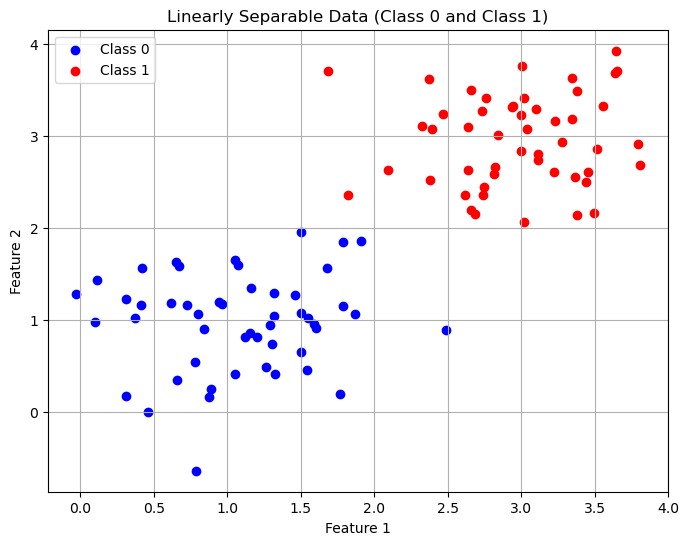

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data (Class 0 and Class 1)')
plt.legend()
plt.grid(True)
plt.show()

### Split dataset into train and test data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scale the data

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Apply SVM with Linear kernel

In [45]:
svm_lin = SVC(kernel='linear')
svm_lin.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [46]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)

SVC()

### Performance Metrics

In [47]:
y_pred_lin = svm_lin.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [ ]:
print("Linear Kernel: ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lin):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lin))
print("---"*20)
print("RBF Kernel: ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))

Linear Kernel: 
Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

------------------------------------------------------------
RBF Kernel: 
Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Visualize the decision boundary

In [49]:
xx, yy = np.meshgrid(np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 500))

In [50]:
Z = svm_lin.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

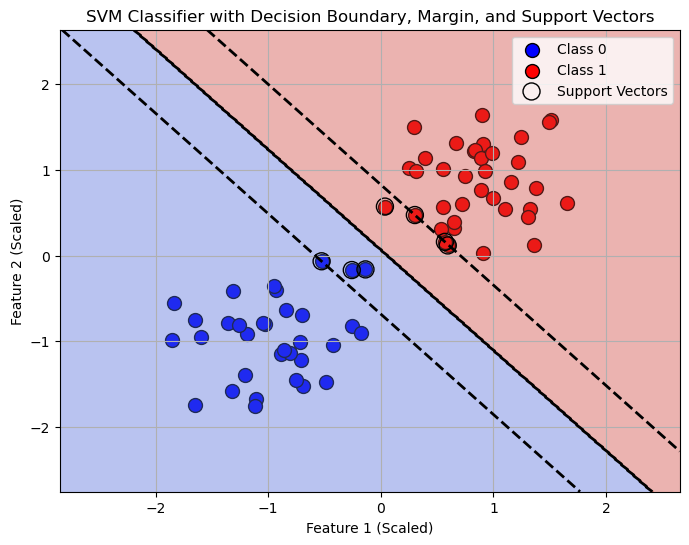

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], c='blue', label='Class 0', edgecolors='k', s=100)
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], c='red', label='Class 1', edgecolors='k', s=100)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

Z_margin = svm_lin.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_margin = Z_margin.reshape(xx.shape)
plt.contour(xx, yy, Z_margin, levels=[-1, 1], colors='k', linestyles='--', linewidths=2)
plt.scatter(svm_lin.support_vectors_[:, 0], svm_lin.support_vectors_[:, 1], s=150, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('SVM Classifier with Decision Boundary, Margin, and Support Vectors')
plt.legend()
plt.grid(True)
plt.show()

### Result

A Support Vector Machine (SVM) classifier was successfully implemented to separate two linearly separable classes, with clear visualization of decision boundaries and support vectors.

---